![](https://upload.wikimedia.org/wikipedia/commons/thumb/e/ed/Pandas_logo.svg/1200px-Pandas_logo.svg.png)

# <center> LESSON 5: Introduction to PANDAS </center>

## 1. INTRODUCTION

### 1.1 What is Pandas? 

`Pandas = Panel Data`

### 1.2 Installation

- Cài đặt khi tạo môi trường ảo:
```
conda create -n hanh python=3.7 pandas
```
- Cài đặt sau khi tạo xong môi trường ảo:
```
conda install pandas
```
hoặc 
```
pip install pandas
```

### 1.3 Import 

**Reference**: 
- [Pandas Cheatsheet](https://pandas.pydata.org/Pandas_Cheat_Sheet.pdf)
- [Python for Data Analysis](https://bedford-computing.co.uk/learning/wp-content/uploads/2015/10/Python-for-Data-Analysis.pdf)

## 2. BASICS

### 2.1 Objects in Pandas

- **DataFrame**: table, `pd.DataFrame()`
- **Series**: column, `pd.Series()`

![](https://media.geeksforgeeks.org/wp-content/cdn-uploads/creating_dataframe1.png)
![](https://analyticssavvy.com/wp-content/uploads/2020/05/series-and-dataframe.png)


#### 2.1.1 How to create a DataFrame

1. Tạo ra 1 DataFrame rỗng

2. Tạo ra 1 DataFrame từ dict

3. Tạo ra 1 DataFrame từ list của list

4. Tạo ra 1 DataFrame từ zip

5. Tạo từ 1 chuỗi numpy

#### 2.1.2 How to create a Series

### 2.2 I/O

Link: https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data

### 2.3 Indexing

Chọn tất cả các dòng (slicing):
- `loc`: location `df.loc[row_label,col_label]`, `series.loc[row_label]`
- `iloc`: index location `df.iloc[row_index,col_index]`, `series.iloc[row_index]`

Chọn 1 cell:
- `at`:  `df.at[row_label,col_label]`
- `iat`: `df.iat[row_index,col_index]`

In [3]:
import seaborn as sns

tips_df = sns.load_dataset('tips')
tips_df.head(5)

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [4]:
tips_df['total_bill']

0      16.99
1      10.34
2      21.01
3      23.68
4      24.59
       ...  
239    29.03
240    27.18
241    22.67
242    17.82
243    18.78
Name: total_bill, Length: 244, dtype: float64

In [5]:
tips_df.loc[1,'total_bill'] #co the lay duoc 1 hoac nhieu diem du lieu

10.34

In [6]:
tips_df.iloc[1,0] #co the lay duoc 1 hoac nhieu diem du lieu

10.34

In [7]:
tips_df.at[1,'total_bill'] #Chi lay 1 diem du lieu

10.34

In [8]:
tips_df.iat[1,0] #Chi lay 1 diem du lieu

10.34

In [9]:
# In ra 6 dong dau tien tu cot total_bill den sex
tips_df.loc[0:4,'total_bill':'sex']
# hoac dung cau lenh: tips_df.loc[:4,:'sex']

,total_bill,tip,sex
0,16.99,1.01,Female
1,10.34,1.66,Male
2,21.01,3.50,Male
3,23.68,3.31,Male
4,24.59,3.61,Female


In [11]:
tips_df.iloc[:5,:3] # index inclusive start, exclusive end

,total_bill,tip,sex
0,16.99,1.01,Female
1,10.34,1.66,Male
2,21.01,3.50,Male
3,23.68,3.31,Male
4,24.59,3.61,Female


In [12]:
tips_df['total_bill'].to_frame() #cach bien series thanh data frame co 1 cot

,total_bill
0,16.99
1,10.34
2,21.01
3,23.68
4,24.59
...,...
239,29.03
240,27.18
241,22.67
242,17.82


In [15]:
import pandas as pd
pd.DataFrame(tips_df['total_bill']) #cach 2: bien series thanh data frame co 1 cot

,total_bill
0,16.99
1,10.34
2,21.01
3,23.68
4,24.59
...,...
239,29.03
240,27.18
241,22.67
242,17.82


In [17]:
#cach 3: bien series thanh data frame co 1 cot
tips_df[['total_bill']]

,total_bill
0,16.99
1,10.34
2,21.01
3,23.68
4,24.59
...,...
239,29.03
240,27.18
241,22.67
242,17.82


In [13]:
type(tips_df['total_bill'].to_frame())

pandas.core.frame.DataFrame

In [ ]:
#Cach in tat ca du lieu trong hang.cot
pd.option.display.max_rows = None (Co the thay None bang so luong hang/cot can in)
pd.option.display.max_columns = None

In [19]:
tips_df.describe()

,total_bill,tip,size
count,244.000000,244.000000,244.000000
mean,19.785943,2.998279,2.569672
std,8.902412,1.383638,0.951100
min,3.070000,1.000000,1.000000
25%,13.347500,2.000000,2.000000
50%,17.795000,2.900000,2.000000
75%,24.127500,3.562500,3.000000
max,50.810000,10.000000,6.000000


### 2.4 Masking

Lọc các thông tin (tương tự hàm filter của excel)

- `df_name.loc[conditions]`
- `df_name[conditions]`
- `df_name.query(conditions)`

Loc ra tat ca cac thong tin cua khach hang loa nu voi `tip_df`

In [20]:
tips_df.loc[tips_df['sex']=='Female'].head(3)

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
11,35.26,5.00,Female,No,Sun,Dinner,4


In [21]:
tips_df[tips_df['sex'] == 'Female'].head(3)

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
11,35.26,5.00,Female,No,Sun,Dinner,4


In [23]:
tips_df.query("sex =='Female'").head(3)

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
11,35.26,5.00,Female,No,Sun,Dinner,4


Loc ra tat ca cac khach hang la nu, co hut thuoc voi `tips_df`

Condition: AND/ `&`
- sex = Female
- Smoker = Yes

In [25]:
condition = (tips_df['sex'] == 'Female') & (tips_df['smoker'] == 'Yes') # neu dau hoac se dung dau [
tips_df.loc[condition].head(3)

,total_bill,tip,sex,smoker,day,time,size
67,3.07,1.00,Female,Yes,Sat,Dinner,1
72,26.86,3.14,Female,Yes,Sat,Dinner,2
73,25.28,5.00,Female,Yes,Sat,Dinner,2


In [27]:
tips_df.query("sex =='Female' & smoker == 'Yes'").head(3)

,total_bill,tip,sex,smoker,day,time,size
67,3.07,1.00,Female,Yes,Sat,Dinner,1
72,26.86,3.14,Female,Yes,Sat,Dinner,2
73,25.28,5.00,Female,Yes,Sat,Dinner,2


#### Bài tập:

    1. Lọc tất cả các bản ghi chứa thông tin khách hàng là nam mà có tổng hóa đơn total_bill lớn hơn 10
    2. Lọc tất cả các bản ghi chứa thông tin khách hàng không hút thuốc và sử dụng suất ăn cho 3 người trở lên
    3. Lọc tất cả các bản ghi chứa thông tin khách hàng là nữ ăn tối tại nhà hàng vào cuối tuần (T7,CN) và tip cho nhân viên từ 5 đô trở lên.

In [31]:
tips_df.query("sex == 'Male' & total_bill >10").head(3)

,total_bill,tip,sex,smoker,day,time,size
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2


In [32]:
tips_df.query("smoker == 'No' & size > 2").head(3)

,total_bill,tip,sex,smoker,day,time,size
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
4,24.59,3.61,Female,No,Sun,Dinner,4


In [43]:
tips_df.query("sex == 'Female' & time == 'Dinner' & day == ['Sat','Sun'] & tip >= 5")

,total_bill,tip,sex,smoker,day,time,size
11,35.26,5.00,Female,No,Sun,Dinner,4
52,34.81,5.20,Female,No,Sun,Dinner,4
73,25.28,5.00,Female,Yes,Sat,Dinner,2
155,29.85,5.14,Female,No,Sun,Dinner,5
214,28.17,6.50,Female,Yes,Sat,Dinner,3


In [46]:
tips_df.query("sex == 'Female' & time == 'Dinner' & (day == 'Sat' | day == 'Sun') & tip >= 5")

,total_bill,tip,sex,smoker,day,time,size
11,35.26,5.00,Female,No,Sun,Dinner,4
52,34.81,5.20,Female,No,Sun,Dinner,4
73,25.28,5.00,Female,Yes,Sat,Dinner,2
155,29.85,5.14,Female,No,Sun,Dinner,5
214,28.17,6.50,Female,Yes,Sat,Dinner,3


In [42]:
condition = (tips_df['sex'] == 'Female') & (tips_df['time'] == 'Dinner') & (tips_df['day'].str.startswith("S")) & (tips_df['tip'] >= 5)  

tips_df.loc[condition]

,total_bill,tip,sex,smoker,day,time,size
11,35.26,5.00,Female,No,Sun,Dinner,4
52,34.81,5.20,Female,No,Sun,Dinner,4
73,25.28,5.00,Female,Yes,Sat,Dinner,2
155,29.85,5.14,Female,No,Sun,Dinner,5
214,28.17,6.50,Female,Yes,Sat,Dinner,3


### 2.5 Operations

#### 2.5.1 Groupby

![](https://blog.dask.org/images/split-apply-combine.png)

Syntax: `groupby()`

In [47]:
tips_df.head(3) #tail() sample()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3


Tính trung bình số tiền mà mỗi giới tính phải trả khi ăn tại nhà hàng này

In [48]:
tips_df.groupby('sex').total_bill.mean() 

sex
Male      20.744076
Female    18.056897
Name: total_bill, dtype: float64

In [50]:
tips_df['total_bill_tip'] = tips_df['total_bill'] + tips_df['tip']
tips_df.head(3)

,total_bill,tip,sex,smoker,day,time,size,total_bill_tip
0,16.99,1.01,Female,No,Sun,Dinner,2,18.00
1,10.34,1.66,Male,No,Sun,Dinner,3,12.00
2,21.01,3.50,Male,No,Sun,Dinner,3,24.51


In [51]:
tips_df.groupby('sex').total_bill_tip.mean()

sex
Male      23.833694
Female    20.890345
Name: total_bill_tip, dtype: float64

In [52]:
tips_df.groupby('sex').total_bill_tip.mean().to_frame() # dùng to_frame() để thể hiện tên cột và về dạng frame

,total_bill_tip
sex,
Male,23.833694
Female,20.890345


Số tiền lớn nhất, nhỏ nhất, trung bình khách hàng chi trả (tách riêng hóa đơn và tip) cho khách hàng theo mỗi giới tính

In [54]:
tips_df.groupby('sex').agg({'total_bill':['max','min','mean'],'tip':['max','min','mean']}) 
# loai du lieu trogn agg() la dictionary{key: value}

total_bill                    tip               
              max   min       mean   max  min      mean
sex                                                    
Male        50.81  7.25  20.744076  10.0  1.0  3.089618
Female      44.30  3.07  18.056897   6.5  1.0  2.833448

In [55]:
tips_df.groupby('sex').agg(mean_total_bill_tip=('total_bill_tip','mean'))

,mean_total_bill_tip
sex,
Male,23.833694
Female,20.890345


In [56]:
tips_df.groupby('sex').agg(mean_total_bill_tip=('total_bill_tip','mean'),mean_total_bill=('total_bill','mean'))

,mean_total_bill_tip,mean_total_bill
sex,,
Male,23.833694,20.744076
Female,20.890345,18.056897


Nếu có thêm condition thì dùng syntax sau:
`tips_df[conditions].groupby()`

#### Bài tập:

1. Tính tổng doanh thu của nhà hàng theo thời gian dùng bữa của khách hàng theo `tips_df`
2. Tính tổng doanh thu không tính tip của nhà hàng theo thời gian dùng bữa với riêng các khách hàng không hút thuốc vào ngày chủ nhật.

In [57]:
tips_df.groupby('time').agg(total_sales=('total_bill_tip','sum'))

,total_sales
time,
Lunch,1352.98
Dinner,4206.37


In [58]:
tips_df.groupby('time').total_bill_tip.sum().to_frame()


,total_bill_tip
time,
Lunch,1352.98
Dinner,4206.37


In [60]:
tips_df[(tips_df['smoker']=='No') & (tips_df['day']=='Sun')].groupby('time').total_bill.sum().to_frame()

,total_bill
time,
Lunch,0.00
Dinner,1168.88


In [61]:
tips_df.query("smoker=='No' & day=='Sun'").groupby('time').agg(sum_total_bill=('total_bill','sum'))


,sum_total_bill
time,
Lunch,0.00
Dinner,1168.88


#### 2.5.2 Pivot

Tính trung bình số tiền mỗi giới tính trả khi ăn tại nhà hàng

In [62]:
tips_df.pivot_table(values='total_bill_tip',index='sex',aggfunc='mean')

,total_bill_tip
sex,
Male,23.833694
Female,20.890345


<AxesSubplot:xlabel='sex'>

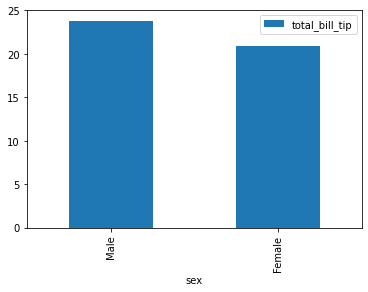

In [63]:
tips_df.pivot_table(values='total_bill_tip',index='sex',aggfunc='mean').plot.bar()

# Neu khong hien len thi su dung câu lệnh sau: 
'''import matplotlib as plt
plt.show()'''

<AxesSubplot:xlabel='sex'>

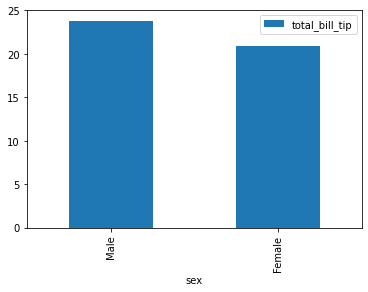

In [65]:
import matplotlib as plt
tips_df.pivot_table(values='total_bill_tip',index='sex',aggfunc='mean').plot(kind='bar')

#### 2.5.3 Others

|Merge methods| SQL Join Name | Meaning| _merge|
|-|-|-|-|
|left| LEFT OUTER JOIN|Chỉ sử dụng keys bên trái|left_only|
|right| RIGHT OUTER JOIN|Chỉ sử dụng keys bên phải|right_only|
|outer|FULL OUTER JOIN|Sử dụng keys của cả 2 dataframes|both|
|inner|INNER JOIN|Chỉ sử dụng keys giao nhau của 2 dataframes|both|

![](https://lh3.googleusercontent.com/-n76c6dtr5sw/YBO5d-3PzGI/AAAAAAAAAh8/xiT6YIzePLEXArb8uU1f1vgg8JRXYeg8ACLcBGAsYHQ/image.png) 

In [71]:
left = tips_df.head(6)[['total_bill','tip']].reset_index()
right = tips_df.loc[4:8][['tip','sex']].reset_index()

In [72]:
left

,index,total_bill,tip
0,0,16.99,1.01
1,1,10.34,1.66
2,2,21.01,3.50
3,3,23.68,3.31
4,4,24.59,3.61
5,5,25.29,4.71


In [73]:
right

,index,tip,sex
0,4,3.61,Female
1,5,4.71,Male
2,6,2.00,Male
3,7,3.12,Male
4,8,1.96,Male


In [74]:
left.merge(right, how = 'left', on= 'index')

,index,total_bill,tip_x,tip_y,sex
0,0,16.99,1.01,NaN,NaN
1,1,10.34,1.66,NaN,NaN
2,2,21.01,3.50,NaN,NaN
3,3,23.68,3.31,NaN,NaN
4,4,24.59,3.61,3.61,Female
5,5,25.29,4.71,4.71,Male


In [75]:
left.merge(right, how = 'left', on= ['index','tip'])

,index,total_bill,tip,sex
0,0,16.99,1.01,NaN
1,1,10.34,1.66,NaN
2,2,21.01,3.50,NaN
3,3,23.68,3.31,NaN
4,4,24.59,3.61,Female
5,5,25.29,4.71,Male


In [76]:
left.merge(right, how = 'right', on= ['index','tip'])

,index,total_bill,tip,sex
0,4,24.59,3.61,Female
1,5,25.29,4.71,Male
2,6,NaN,2.00,Male
3,7,NaN,3.12,Male
4,8,NaN,1.96,Male


In [77]:
left.merge(right, how = 'inner', on= ['index','tip'])

,index,total_bill,tip,sex
0,4,24.59,3.61,Female
1,5,25.29,4.71,Male


In [78]:
left.merge(right, how = 'outer', on= ['index','tip'])

,index,total_bill,tip,sex
0,0,16.99,1.01,NaN
1,1,10.34,1.66,NaN
2,2,21.01,3.50,NaN
3,3,23.68,3.31,NaN
4,4,24.59,3.61,Female
5,5,25.29,4.71,Male
6,6,NaN,2.00,Male
7,7,NaN,3.12,Male
8,8,NaN,1.96,Male
